<h1 style="text-align:center;">Data Cleaning Practice</h1>

- Let's begin by importing the necessary libraries and the dataset:

In [959]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("all_bikez_curated.csv")
df.sample(5)

,Brand,Model,Year,Category,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Fuel control,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm)
12542,honda,cbf stunner,2014,Sport,124.7,11.6,Single cylinder,four-stroke,5-speed,13.00,Carburettor. CV type,Overhead Cams (OHC),Air,Chain,110.0,1271.0,NaN
18121,kawasaki,ninja 1000,2012,Sport,1043.0,NaN,In-line four,four-stroke,6-speed,18.93,Injection. DFI with four 38mm Keihin throttle...,Double Overhead Cams/Twin Cam (DOHC),Liquid,Chain,NaN,1445.0,820.0
18169,kawasaki,ninja 250sl krt edition,2017,Sport,249.0,31.0,Single cylinder,four-stroke,6-speed,11.00,Injection,Double Overhead Cams/Twin Cam (DOHC),Liquid,Chain,NaN,1330.0,780.0
35115,yamaha,fz6 fazer abs,2007,Naked bike,600.0,76.4,In-line four,four-stroke,NaN,19.40,Injection,Double Overhead Cams/Twin Cam (DOHC),Liquid,NaN,191.0,1440.0,795.0
21027,ktm,prestige,2006,Super motard,625.0,53.6,Single cylinder,four-stroke,5-speed,NaN,NaN,Overhead Cams (OHC),Liquid,Chain,NaN,1510.0,910.0


### 💾 The data:
- "Brand" - brand name of the motorcycle.
-	"Model" - model name of the motorcycle.
-	"year" - year the motorcycle was built.
-	"Category" - sub-class the motorcycle belongs to in the market (style of motorcycle).
-	"Displacement (ccm)" - engine size of the motorcycle in cubic centimeters (ccm).
-	"Power (hp)" - max power output in horsepower (hp) and kilowatt (kW) along with peak power rpm.
-	"Engine cylinder" - number of cylinders in the engine as well as configuration.
-	"Engine stroke" - number of stages to complete one power stroke of the engine.
-	"Gearbox" - number of gears in transmission.
-	"Transmission type" - type of transmission of the motorcycle.
-	"Dry weight (kg)" - weight of the motorcycle, without any fluids, in kilograms (kg) and pounds (lbs).
-	"Wheelbase (mm)" - distance between the points where the front and rear wheels touch the ground in millimeters (mm).
-	"Fuel capacity (lts)" - maximum capacity of fuel tank in liters (lts).
-	"Fuel system" - fuel delivery system into engine.
-	"Fuel control" - valve configuration fo the engine.
-	"Seat height (mm)" - height from bottom of seat to the ground in millimeters (mm).
-	"Cooling system" - engine cooling system.



## Inspecting and Cleaning

In [960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38543 entries, 0 to 38542
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38543 non-null  object 
 1   Model                38515 non-null  object 
 2   Year                 38543 non-null  object 
 3   Category             38543 non-null  object 
 4   Displacement (ccm)   37514 non-null  float64
 5   Power (hp)           26162 non-null  float64
 6   Engine cylinder      38527 non-null  object 
 7   Engine stroke        38532 non-null  object 
 8   Gearbox              32733 non-null  object 
 9   Fuel capacity (lts)  31747 non-null  float64
 10  Fuel system          27893 non-null  object 
 11  Fuel control         22032 non-null  object 
 12  Cooling system       34322 non-null  object 
 13  Transmission type    32912 non-null  object 
 14  Dry weight (kg)      22534 non-null  float64
 15  Wheelbase (mm)       25530 non-null 

In [961]:
df.columns = ['brand', 'model', 'year', 'category', 'displacement', 'power', 'engine_cylinder', 'engine_stroke', \
                'gear_box', 'fuel_capacity', 'fuel_system', 'fuel_control', 'cooling_system', 'trans_type', 'dry_weight',\
                    'wheelbase', 'seat_height'] 

In [962]:
df.sample()

,brand,model,year,category,displacement,power,engine_cylinder,engine_stroke,gear_box,fuel_capacity,fuel_system,fuel_control,cooling_system,trans_type,dry_weight,wheelbase,seat_height
22903,megelli,sport 250r,2016,Sport,249.6,27.0,Single cylinder,four-stroke,6-speed,7.0,Carburettor. TK/MV34,Single Overhead Cams (SOHC),Liquid,Chain,137.0,1349.0,765.0


In [963]:
df.year.unique()

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2040', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2077', '2003', '3019',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1971', '1972', '1970', '1974', '1962 CE', '1963 CE',
       '2005', '2015', '2018 CE', '2006', '1922', '1928', '1949', '1950',
       '1951', '2001', '2017', '1986', '1999', '1985', '1987', '1996',
       '1991', '1988', '1989', '1990', '1992', '2004', '2002', '1997',
       '1998', '2000', '1993', '1984', '1995', '1948', '1937', '1938',
       '1931', '1901', '1902', '1903', '1913', '1914', '1915', '1916',
       '1918', '1932', '1933', '1934', '1935', '1936', '1939', '1940',
       '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1898',
       '1910', '1929', '1975', '1976', '1973', '1977', '1978', '1979',
     

You notice that this column needs some replacements before turning it to integer.

In [964]:
df.year = df.year.astype('str')
df.year = df.year.str.replace(' CE', '')
df.year.replace('3019', '2019', inplace=True)
df.year.replace('2077', '2017', inplace = True)
df.year.replace('2040', '2004', inplace=True)

In [965]:
df.year.unique()

array(['2011', '2007', '2021', '2016', '2018', '2020', '2022', '1923',
       '1924', '1925', '1926', '1927', '2009', '2010', '2014', '2008',
       '2019', '2012', '2013', '2004', '1957', '1958', '1955', '1956',
       '1952', '1953', '1954', '1959', '1960', '2017', '2003', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1971', '1972', '1970', '1974', '2005', '2015', '2006', '1922',
       '1928', '1949', '1950', '1951', '2001', '1986', '1999', '1985',
       '1987', '1996', '1991', '1988', '1989', '1990', '1992', '2002',
       '1997', '1998', '2000', '1993', '1984', '1995', '1948', '1937',
       '1938', '1931', '1901', '1902', '1903', '1913', '1914', '1915',
       '1916', '1918', '1932', '1933', '1934', '1935', '1936', '1939',
       '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947',
       '1898', '1910', '1929', '1975', '1976', '1973', '1977', '1978',
       '1979', '1980', '1982', '1983', '1981', '1917', '1919', '1994',
      

In [966]:
df.year = df.year.astype('int')

print(df.year.apply(lambda x: x > 2024).any())
print(df.year.apply(lambda x: x == np.NaN).any())
print(df.year.isna().any())

False
False
False


In [967]:
df.category.value_counts(dropna=False)

Scooter                      6704
Sport                        5557
Enduro / offroad             4273
Custom / cruiser             4161
Naked bike                   3251
Allround                     3141
Classic                      1885
Super motard                 1634
Touring                      1573
ATV                          1489
Sport touring                1364
Cross / motocross            1243
Unspecified category          806
Trial                         560
Minibike, cross               529
Prototype / concept model     210
Minibike, sport               142
Speedway                       21
Name: category, dtype: int64

In [968]:
df.category = df.category.astype('category')

In [969]:
df.engine_cylinder.value_counts(dropna=False)

Single cylinder         20717
V2                       7456
Twin                     3392
In-line four             3169
Electric                  997
Two cylinder boxer        936
In-line three             852
V4                        459
Six cylinder boxer        137
In-line six               114
V8                         79
Four cylinder boxer        53
V6                         42
Diesel                     37
Square four cylinder       33
Gas turbine                19
NaN                        16
Dual disk Wankel           13
Radial                     10
Single disk Wankel          8
V3                          3
V10                         1
Name: engine_cylinder, dtype: int64

In [970]:
df.engine_stroke.value_counts(dropna=False)

 four-stroke            30721
 two-stroke              6694
Electric                  997
Diesel                     37
Square four cylinder       33
Gas turbine                19
Dual disk Wankel           13
NaN                        11
Radial                     10
Single disk Wankel          8
Name: engine_stroke, dtype: int64

In [971]:
df.engine_stroke.replace(' four-stroke', 'Four-stroke', inplace=True)
df.engine_stroke.replace(' two-stroke', 'Two-stroke', inplace=True)

In [972]:
df.gear_box.value_counts(dropna=False)

6-speed                 11912
5-speed                 11002
Automatic                6050
NaN                      5810
4-speed                  2799
3-speed                   478
1-speed                   289
2-speed                    93
4-speed with reverse       49
7-speed                    24
100-speed                  15
2-speed automatic           8
5-speed with reverse        5
10-speed                    4
8-speed                     3
6-speed with reverse        1
3-speed automatic           1
Name: gear_box, dtype: int64

In [973]:
df.gear_box = df.gear_box.str.replace('100-speed|8-speed|10-speed', '7-speed', regex=True, case=False)

In [974]:
df.gear_box.value_counts()

6-speed                 11912
5-speed                 11002
Automatic                6050
4-speed                  2799
3-speed                   478
1-speed                   289
2-speed                    93
4-speed with reverse       49
7-speed                    46
2-speed automatic           8
5-speed with reverse        5
6-speed with reverse        1
3-speed automatic           1
Name: gear_box, dtype: int64

In [944]:
df.trans_type.value_counts(dropna=False)

Chain          21489
Belt            7112
NaN             5631
Shaft drive     4311
Name: trans_type, dtype: int64

In [945]:
df.gear_box.fillna(df.gear_box.mode()[0], inplace=True)
df.fuel_capacity.fillna(df.fuel_capacity.median(), inplace=True)
df.trans_type.fillna("Unknown", inplace=True)

df.drop(columns=['dry_weight', 'wheelbase', 'seat_height', 'fuel_system', 'fuel_control', 'power'], axis=1, inplace=True)

In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38543 entries, 0 to 38542
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand            38543 non-null  object  
 1   model            38515 non-null  object  
 2   year             38543 non-null  int32   
 3   category         38543 non-null  category
 4   displacement     37514 non-null  float64 
 5   engine_cylinder  38527 non-null  object  
 6   engine_stroke    38532 non-null  object  
 7   gear_box         38543 non-null  object  
 8   fuel_capacity    38543 non-null  float64 
 9   cooling_system   34322 non-null  object  
 10  trans_type       38543 non-null  object  
dtypes: category(1), float64(2), int32(1), object(7)
memory usage: 2.8+ MB


In [947]:
df.cooling_system.value_counts(dropna=False)

Air            16968
Liquid         15725
NaN             4221
Oil & air       1621
Liquids            3
air                2
the air            1
airr               1
Oil and air        1
Name: cooling_system, dtype: int64

In [948]:
df.cooling_system = df.cooling_system.str.lower()
df.cooling_system.replace("liquids", "liquid", inplace=True)
df.cooling_system = df.cooling_system.str.replace("the air|airr", "air", regex=True, case=False)
df.cooling_system.replace("oil & air", "oil and air", inplace=True)

In [949]:
df.cooling_system.value_counts(dropna=False)

air            16972
liquid         15728
NaN             4221
oil and air     1622
Name: cooling_system, dtype: int64

In [950]:
df.cooling_system.fillna("Unknown", inplace=True)

In [951]:
df.isna().sum()

brand                 0
model                28
year                  0
category              0
displacement       1029
engine_cylinder      16
engine_stroke        11
gear_box              0
fuel_capacity         0
cooling_system        0
trans_type            0
dtype: int64

<AxesSubplot:xlabel='displacement'>

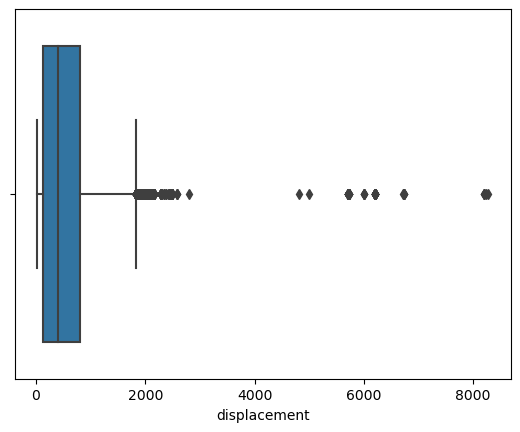

In [952]:
sns.boxplot(df.displacement)

In [953]:
df.displacement.fillna(df.displacement.median(), inplace=True)

In [954]:
df.isna().sum()

brand               0
model              28
year                0
category            0
displacement        0
engine_cylinder    16
engine_stroke      11
gear_box            0
fuel_capacity       0
cooling_system      0
trans_type          0
dtype: int64

In [955]:
df.dropna(inplace=True)

In [956]:
df.drop_duplicates(inplace=True)

In [957]:
df.engine_cylinder = df.engine_cylinder.astype('category')
df.engine_stroke = df.engine_stroke.astype('category')
df.gear_box = df.gear_box.astype('category')

In [958]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38428 entries, 0 to 38476
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand            38428 non-null  object  
 1   model            38428 non-null  object  
 2   year             38428 non-null  int32   
 3   category         38428 non-null  category
 4   displacement     38428 non-null  float64 
 5   engine_cylinder  38428 non-null  category
 6   engine_stroke    38428 non-null  category
 7   gear_box         38428 non-null  category
 8   fuel_capacity    38428 non-null  float64 
 9   cooling_system   38428 non-null  object  
 10  trans_type       38428 non-null  object  
dtypes: category(4), float64(2), int32(1), object(4)
memory usage: 2.3+ MB


### Recap
- We replaced columns names with easy ones.
- We fixed 'Year' column by removing the 'CE' and converting it to integer.
- We fixed other columns' data types.
- We filled missing values of columns 'gearbox' with the mode, 'cooling_system' and 'trans_type' with the "Unkown"word.
- We filled missing values of "fuel_capacity" with the median of each column.
- we dropped 'dry_weight', 'wheelbase', 'seat_height', 'fuel_system', 'power' and 'fuel_control' columns as they have too many missing values.
- We dropped rows with missing values in 'model', 'engine_stroke' and 'engine_cylinder' columns.

<h2 style="text-align:center;">Thank You</h2>